<a href="https://colab.research.google.com/github/iamStephenE/Electromyography-and-Gradient-Boosting/blob/main/Electromyography_and_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electromyography and Gradient Boosting
## Stephen Ebrahim
## CS 301 - 103

## Background and Documentation (30 points)

### Gradient Boosting

The term boosting is synonymous with improving or enhancing and the idea of it in machine learning is concerned with whether or not the model can be improved through some sort of technique. Generally, this boosting is performed to maximize the accuracy, or in other words, minimize the error. To build on this idea, the minimization of error involves a concept called residual, which simply refers to how different the prediction is compared to the true value - the remnants of the difference.

$$r=\hat{y}_i - y_i$$

Residual between  $\hat{y}_i$ (prediction), and $y_i$ (true value).

The central idea surrounding gradient boosting is to keep recursively computing the residual and improving the model based on that; essentially it is an optimization problem, and that is where the "gradient" part of the name comes in. A gradient suggests that there is an optimal solution that the model can go towards. For instance, in gradient descent, this concept was very evident because, in the algorithm, the model took a step in the negative gradient direction to find the global minimum value. Similarly here, the tree will use the gradient based on the residuals to make a change in the tree that would lead it to the optimal tree with the least error. The key difference between gradient boosting and gradient descent is that gradient descent depends entirely on optimizing a parameter that it keeps using throughout the learning process, whereas, gradient boosting depends on the composition of models. This composition idea refers back to the Ensemble Predictions method which involves the usage of multiple weak models that support each other and ultimately together form an accurate model.

The Gradient Boosting process can be illustrated through the following steps.

Let's start with a model that to fit:

$$F_1(X)=y$$

where $F_1$ represents the first model, $X$ represents the input data, and $y$ is what we try to go towards or fit. We can calculate the residual of the error produced by this model through the following:

$$h_1(X)=y-F_1(X)$$

where $h_1$ represents the residual of the first model. Now, we can use these two values to create a newer and more accurate model that considers the error of the residual.

$$F_2(X)=F_1(X)+h_1(X)$$

From this, it is very easy to generalize the question into a recurrence relation that both capture the idea of Ensemble Predictions as well as the recursive nature of the model.

$$F_{n}(X)=F_{n-1}(X)+\gamma_mh_{n-1}(X)$$

where $F_n$ is the $n^{th}$ model. Here we also add a variable $\gamma_m$ and this will control the step size of how the residual will change model $F_{n-1}$ to make the new mode $F_n$. This variable works exactly the same way as the learning rate in gradient descent did. Essentially, because the gradient (in this case, the residual) may have a large impact on the model, $\gamma_m$ will in a way normalize that value and restrict it from making a drastic impact. This way, the model improves at a consistent rate without too much uncertainty or randomness.

Essentially, the boosting performed in this algorithm attempts to reduce the residual with every iteration. Furthermore, minimizing the residual is the same as minimizing the square of the residual, consequently, it is the same as minimizing the mean square error (MSE) or improving the accuracy of the model.

$$MSE = L(F_n(X),y) = \frac{1}{m} \sum_{i=1}^m (F_n(x_i) - y_i)^2$$

Mean square error where $m$ represents the number of examples, $i$ represents the index of an example, $F_n$ represents the $n^{th}$ model which is used as the hypothesis, $x_i$ is the $i^{th}$ example and $y_i$ is the true value of the $i^{th}$ example.

Now, we can calculate the gradient from the $L(y_i, F(x_i))$ equation above:

$$r_{in} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{n-1}(x)} \quad \text{for } i=1, \ldots, m$$

which can be further simplified to

$$r_{in} = -\frac{2}{m} \sum_{i=1}^m (F_{n-1}(x_i) - y_i) \quad \text{for } i=1, \ldots, m$$

Using this we can apply it to a weak learner (which is just a model that does not perform well) and then use the recurrence relation defined above to get the new model.

Through this, we can have learned about Gradient Boosting and how to effectively apply this technique to improve our model.

<br/>
<hr>

### References:
[1] https://explained.ai/gradient-boosting/

[2] https://www.kaggle.com/code/kashnitsky/topic-10-gradient-boosting/notebook

[3] https://www.gormanalysis.com/blog/gradient-boosting-explained/#motivation


## Coding from scratch using JAX (30 points)
<font color='green'>
Note to grader: As professor mentioned to achieve a score of 100% on this assignment, we must implement from scratch the boosting algorithm and that is what I have done. I have used the DecisionTreeClassifier provided by Sklearn as professor said we can.
</font>

In this section, I will implement gradient boosting from scratch with the help of Sklearn's DecisionTreeClassifier as a decision Tree while also using the JAX ecosystem.

In [ ]:
import jax
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Generating Toy Data
Firstly, we will generate the toy dataset that we will apply Gradient Boosting too. This dataset we will be generating the clipped cosinusoidal dataset; the bias is the cosine function with an off set to imitate noisy data. The will be the dataset used to do the classification task using gradient boosting, and in this case it is simply two classes: 1 and -1 with only one input feature $x \in (-5, 5)$.

In [ ]:
# set the number of examples
number_of_examples = 300

# fix the seed for reproducibility
jax_seed = jax.random.PRNGKey(301)

# Generate features: This is a collection of numbers from x = -5 to x = 5
X = jnp.linspace(-5, 5, number_of_examples)

# Generate target: The function being applied here is
# f(x) = 1 if cos(x) >= 0 and f(x) = -1 if cos(x) < 0
y = jnp.array(list(map(lambda x: 1.0 if jnp.cos(x) >= 0 else -1.0, X)))

# then we add a random factor (the epsilon here) to make the data more noise
epsilon = 0.2
y += epsilon * jax.random.uniform(jax_seed, shape=(number_of_examples, 1), minval=-0.5, maxval=0.5)[:,0]

# Using the dataset just created, I will create pandas.DataF```rame
cosinusoidal_data = pd.DataFrame(data=jnp.stack([X, y], axis=1), columns=["X", "y"])

# since jax created an array of objects, we must convert them to floats
cosinusoidal_data = cosinusoidal_data.astype({'X': float, 'y': float})
cosinusoidal_data.head()

,X,y
0,-5.000000,0.914858
1,-4.966555,0.925658
2,-4.933110,0.903882
3,-4.899666,0.986161
4,-4.866221,0.951036


### Processing and Visualizing Data
To visualize how the dataset looks like, the following is a plot of the values generated.

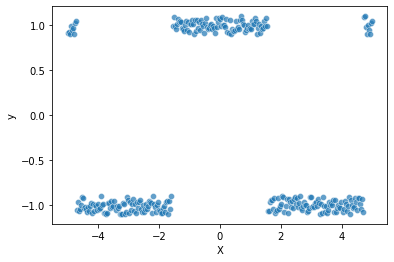

<Figure size 720x720 with 0 Axes>

In [ ]:
# entire cosinusoidal data
sns.scatterplot(x="X", y="y", data=cosinusoidal_data, alpha=0.7)
plt.figure(figsize=(10, 10))
plt.show()

Now, using this generated toy data, we can split the dataset, into training and testing sets (using the standard 80-20 split for training and validation/testing respectively.

In [ ]:
# using sklearn's train_test_split method, we will split the cosinusoidal data
# to perform testing and validation
from sklearn.model_selection import train_test_split

# splitting the data into training and validating/testing (80-20)
train, test = train_test_split(cosinusoidal_data, test_size=0.2)
X_train, y_train = train[["X"]], train[["y"]]
X_test, y_test = test[["X"]], test[["y"]]

# sorting by index so that there is no issue when graphing because when the 
# data is split it is shuffled so issues arise when plotting these values.
X_train, y_train = X_train.sort_index(), y_train.sort_index()
X_test, y_test = X_test.sort_index(), y_test.sort_index()

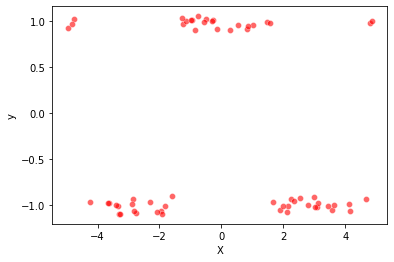

<Figure size 720x720 with 0 Axes>

In [ ]:
# testing data of the cosinusoidal set
sns.scatterplot(x="X", y="y", data=test, alpha=0.6, color="red")
plt.figure(figsize=(10, 10))
plt.show()

In the following method, we will be plotting the predictions my multiple models. Since the models are fit to residuals, we will have many models that together achieve one accurate method. This depicts the ensemble method idea; we "assemble" many models to create one accurate method.

In [ ]:
# we will take in the models, X and y data, an axis to define a range of the 
# plot show on the screen, and other parameters to style the plot accordingly.
# This method also returns the final predictions
def plot_predictions(models, X, y, axes, label=None, style="r-", data_style="b.", data_label=None, color="blue"):

  # Here we sum the predictions of all the models to get the final prediction
  pred = sum(model.predict(X) for model in models)

  # Plotting both the dataset as well as the model prediction
  plt.plot(X, y, data_style, label=data_label, alpha=0.6, color=color)
  plt.plot(X, pred, style, linewidth=2, label=label)

  # Adding the labels
  if label or data_label:
    plt.legend(loc="right")

  plt.ylabel("$y$")
  plt.xlabel("$X$")

  plt.figure(figsize=(10, 10))
  plt.show()

  # returning the final predictions
  return pred


### Performing Gradient boosting
Using the theoretical research and equations discussed above, I will be implementing the Gradient Boosting algorithm. The main equation to follow is
$$F_{n}(X)=F_{n-1}(X)+\gamma_mh_{n-1}(X)$$

For simplicity, I will take $\gamma_m = 1$ for the boosting process. As for the other parameters, I will choose the amount of estimates to be $n_{estimator} = 5$ and the max depth for the tree I will choose to be $depth_{max} = 1$.

It is important to mention that although the dataset has a noisy factor to it, since I am using a Decision Tree Classifier, I have rounded the values when feeding them to the tree so that it is possible to get the two classes using those integers

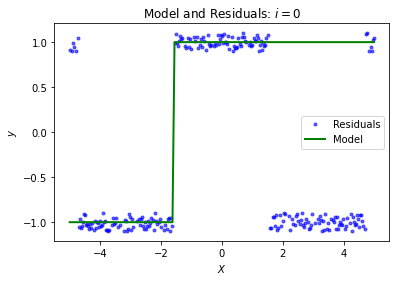

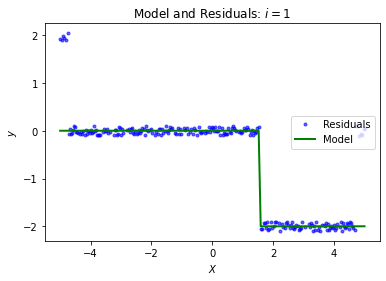

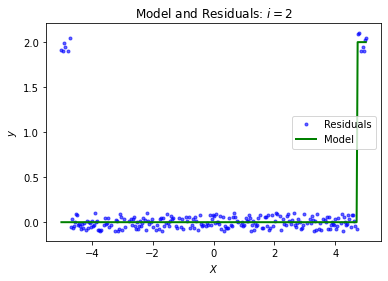

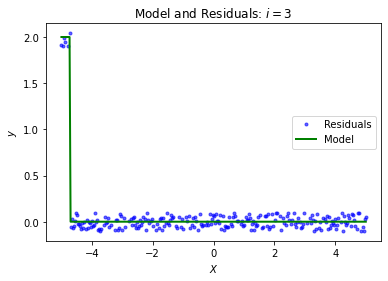

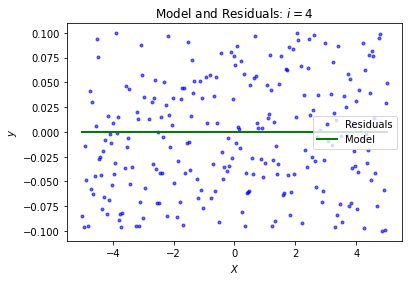

In [ ]:
# importing the tree from sklearn
from sklearn.tree import DecisionTreeClassifier

# the residuals will initially be the training values as that would be the error
# in the beginning.
residuals = jnp.array(y_train)[:,0]

# parameter initialization
n_estimator = 5
dtc_max_depth = 1

# an array to store all the cosinusoidal models created by the trees when
# fitting to the residuals
cosinusoidal_models = []

# We will need a final prediction array to accumulate all the predictions
# from each model. Therefore, we have this array which adds all the model
# predictions that are fitted using the residuals.
pred_f = jnp.zeros(len(y_train))

# Gradient boosting loop
for i in range(n_estimator):
  # creating the DecisionTreeClassifier
  dtc = DecisionTreeClassifier(max_depth=dtc_max_depth)
  # fitting the DTC model
  dtc_model = dtc.fit(X_train, jnp.round_(residuals))
  # getting the prediciton of the ith model
  pred_i = dtc_model.predict(X_train)

  # adding the predictions to the final predicitions array
  pred_f = jnp.add(pred_f, pred_i)

  # Plotting the ith Model and the ith Residuals
  plt.title(f"Model and Residuals: $i = {i}$")
  plt.plot(X_train, residuals, "b.", label="Residuals", alpha=0.6)
  plt.plot(X_train, pred_i, "g-", linewidth=2, label="Model")
  plt.legend(loc="right")
  plt.ylabel("$y$")
  plt.xlabel("$X$")
  plt.show()
  print()
  
  # updating residuals based on the true values and the latest predictions
  residuals = jnp.subtract(jnp.array(y_train)[:,0], pred_f)
  
  # adding the created model to the set of consinusoidal models
  cosinusoidal_models.append(dtc_model)

We can see form the graphs above that the model adjust over time to fit the dataset. Note: although the last one might look messy, the y range is actually from 0.10 to -0.10, meaning that its actually a very small range; all these points actually belong to the same class so this is perfect!

Now, we will move on to using this model on the training and testing to get the accuracy.

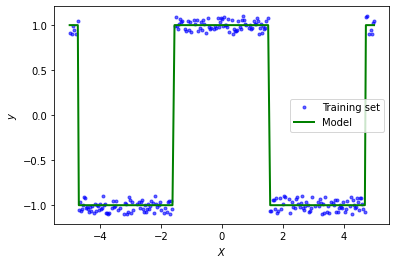

<Figure size 720x720 with 0 Axes>

Traning accuracy:  1.0


In [ ]:
# plot the predictions
preds = plot_predictions(
  cosinusoidal_models, X_train, y_train, axes=[-5, 5, -1.2, 1.2], label="Model", style="g-", data_label="Training set", color="blue"
)

# get the final predictions from the models to get the accuracy
pred = sum(model.predict(X_train) for model in cosinusoidal_models)
# a variable to store the number of correct predictions
correct = 0

# going through the set and finding the correct values
for i in range(len(X_train)):
  # checking if the predictions and the true values are equivalent
  if pred[i] == jnp.round_(jnp.array(y_train)[:,0][i]):
    correct += 1

# Printing the accuracy
print("Traning accuracy: ", correct / len(X_train))

We can see that we have an incredible accuracy of 100% (predicting all the values correctly) for the training set; now let's verify that there is no overfitting by preforming this on the testing set.

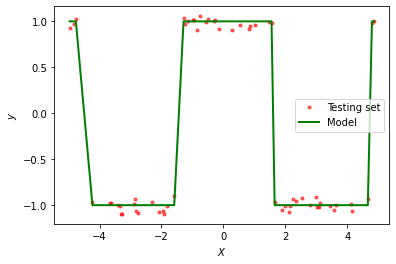

<Figure size 720x720 with 0 Axes>

Testing accuracy:  1.0


In [ ]:
# same as last block but for testing data
preds = plot_predictions(
  cosinusoidal_models, X_test, y_test, axes=[-5, 5, -1.2, 1.2], label="Model", style="g-", data_label="Testing set", color="red"
)

pred = sum(model.predict(X_test) for model in cosinusoidal_models)
correct = 0
for i in range(len(X_test)):
  if pred[i] == jnp.round_(jnp.array(y_test)[:,0][i]):
    correct += 1

print("Testing accuracy: ", correct / len(X_test))

Again, we have achieved a fantastic accuracy score for the testing data which indicates that the model correctly predicts the two classes. The hyper-parameters chosen were: $n_{estimator} = 5$ and $depth_{max} = 1$ which is very simple to compute and does not take a lot of resources or time. As this was a very simple model, it is expected to achieve such great results.

## EMG Dataset (40 points)
Now, I will apply the same gradient boosting implementation algorithm to the EMG Dataset which is located at https://archive.ics.uci.edu/ml/datasets/EMG+Physical+Action+Data+Set.

I have saved this dataset in my google drive, so I will just be loading it from there. 
<font color="red">
Note: if you are trying to run my notebook, this will not work as it will load your own google drive. 
</font>

In [ ]:
# loading the data from my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Loading the data and Processing it:
Here I will load the data from my google drive and processes it as well as placing it into a dataframe. I will also get the actions (target values) in the dataset.

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

# this dictionary will be responsible for integer encoding the varios actions
actions = {}

# all the paths needed to load all the data from my drive
data_dirs = ["gdrive/MyDrive/EMG Physical Action Data Set/sub1/Aggressive/txt/",
             "gdrive/MyDrive/EMG Physical Action Data Set/sub1/Normal/txt/",
             "gdrive/MyDrive/EMG Physical Action Data Set/sub2/Aggressive/txt/",
             "gdrive/MyDrive/EMG Physical Action Data Set/sub2/Normal/txt/",
             "gdrive/MyDrive/EMG Physical Action Data Set/sub3/Aggressive/txt/",
             "gdrive/MyDrive/EMG Physical Action Data Set/sub3/Normal/txt/",
             "gdrive/MyDrive/EMG Physical Action Data Set/sub4/Aggressive/txt/",
             "gdrive/MyDrive/EMG Physical Action Data Set/sub4/Normal/txt/"]

# creating the pandas dataframe for the data
ind = 0
data = pd.DataFrame()

# going through all the paths
for dirs in data_dirs:
  for files in os.listdir(dirs):
    # read the tab separated files from each path (fule)
    with open(os.path.join(dirs, files), "r") as f:  
     # Getting the 8 Columns of data in the files
      temp = pd.read_csv(
        f.name,
        sep = "\t",
        header = None, 
        names = ["ch" + str(i) for i in range(1, 9)]
      )
      
      # chunking using Max of every 10 sequential values.
      temp_chunked = pd.DataFrame()

      for i in range(0, len(temp), 10):
        temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)

      # cleaning up the data
      labels = [files[:-4] for i in range(len(temp_chunked))]
      actions[files[:-4]] = ind
      temp_chunked["Action"] = labels
      data = pd.concat([data, temp_chunked])

      ind += 1

print(actions)

{'Slapping': 61, 'Sidekicking': 60, 'Pushing': 62, 'Punching': 65, 'Pulling': 64, 'Kneeing': 63, 'Headering': 66, 'Hamering': 67, 'Frontkicking': 68, 'Elbowing': 69, 'Waving': 70, 'Walking': 72, 'Running': 73, 'Standing': 74, 'Jumping': 71, 'Hugging': 76, 'Handshaking': 77, 'Seating': 75, 'Bowing': 78, 'Clapping': 79}


From this we can see all the 20 different actions in the dataset.

In [ ]:
data.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Action
0,2.0,113.0,129.0,95.0,-1042.0,845.0,-94.0,-407.0,Slapping
1,4000.0,250.0,-54.0,142.0,-2550.0,303.0,-1458.0,1765.0,Slapping
2,2410.0,1516.0,803.0,8.0,3284.0,309.0,-1877.0,1199.0,Slapping
3,-1556.0,876.0,710.0,85.0,4000.0,213.0,-1517.0,646.0,Slapping
4,4000.0,275.0,304.0,137.0,4000.0,180.0,238.0,251.0,Slapping


### Integer Encoding
Now, since the actions are strings in the dataframe, we must convert them into integers so that we can deal with them easily. To do this, I will use integer encoding which assigns each class an integer (in an increasing fashion). For instance, all the actions that are 'Slapping' will be set to 0, all the actions that are 'Sidekicking' will be set to 1, etc.

In [ ]:
# getting only the input features (ch1 through ch8)
X = abs(data.drop(["Action"], axis=1))
# getting only the ouput feature (action) and also mapping it which preforms
# the integer encoding discussed above.
Y = data["Action"].map(actions)

In [ ]:
# converting the dataframe values into arrays
X = jnp.array(X.values.tolist())
Y = jnp.array(Y.values.tolist())

# Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)
print(f"Training size set = {X_train.shape[0]}\nTest size set = {X_test.shape[0]}")

Training size set = 63810
Test size set = 15953


### Applying the Algorithm from Scratch Again 
Now That we have processed the data and split it into the training and testing sets, we can proceed to gradient boosting.

As this is a much more complicated dataset, I have changed the hyper-parameters to account for the complexity. I will still take $\gamma_m = 1$ for the boosting process; however, for the other parameters, I will choose the amount of estimates to be $n_{estimator} = 100$ and the max depth for the tree I will choose to be $depth_{max} = 7$. This way, the model can do a better job accounting for the plethora different classes.

In [ ]:
# same as previos code

# to store final predictions
pred_final = jnp.zeros(len(Y_train))

# to store the residuals to re-fit the model
residuals = jnp.array(Y_train)

# hyper-parameters
n_estimator = 100
dtc_max_depth = 7

# storing the emg models
emg_dtc_models = []

for i in range(n_estimator):
  # creating the DTC
  emg_dtc = DecisionTreeClassifier(max_depth=dtc_max_depth)
  # fitting the emg model training set to the residuals (I have rounded 
  # to make sure that I am fitting to integers which represent
  # the differetn classes)
  emg_dtc_model = emg_dtc.fit(X_train, jnp.round_(residuals))

  # calculating the predictions for the current iteration, the final
  # predictions and the residuals
  pred_i = emg_dtc_model.predict(X_train)
  pred_final = jnp.add(pred_final, pred_i)
  residuals = jnp.subtract(jnp.array(Y_train), pred_final)

  # adding the model to the set of emg models
  emg_dtc_models.append(emg_dtc_model)


Since the dataset is very complicated, we cannot produce any plots for visualization here; in the cosinusoidal set, there was only one input so it was easy to plot, here there are 8 so we cannot plot them. Instead, we will just be finding the accuracy for both the training and testing set.

In [ ]:
# training accuracy
correct = 0
for i in range(len(Y_train)):
  if (pred_final[i] == Y_train[i]):
    correct += 1

correct / len(Y_train)

0.3422974455414512

In [ ]:
# testing accuracy
pred = sum(model.predict(X_test) for model in emg_dtc_models)
correct = 0
for i in range(len(X_test)):
  if (pred[i] == Y_test[i]):
    correct += 1

correct / len(X_test)

# The following are tests preformed to show the results

# n_estimators, max_depth: Training accuracy, Testing accuracy

# Tests on only Sub1 of the dataset:
# 100, 7: 0.590246067985794, 0.4940400710119199

# Entire dataset:
# 100, 7: 0.34742203416392414, 0.32395160784805366
# 100, 11: 0.5722927440839993, 0.3128565160157964

0.3297185482354416

As it can be see above, I have tried different hyper-parameters but and I have decided to go with are the ones I have mentioned earlier on. I noticed that as the number of estimators increased, there was no change, and as the maximum depth for the tree increased, the accuracy only improved for the training data (overfitting).

Using the entire dataset and $n_{estimator} = 100$ and $depth_{max} = 7$, the accuracy I have observed for the testing set is around 35%, and the accuracy for the training set is around 32%. Although this might seem low, it is actually pretty high since the model has to choose between 20 different classes, and from that, it predicts the correct class more than 30% of the time. Overall, the implementation from scratch does a great job at trying to classify the datapoints according to the different classes.